In blog,The formula about pcc as follow:
    $$Pearson(x,y)=\frac{\sum_{i=1}^{N}(x_i - \bar x)(y_i - \bar y))}{\sqrt{\sum_{i=1}^{N}(x_i - \bar x)^{2}}\sqrt{\sum_{i=1}^{N}(y_i - \bar y)^{2}}}$$

ps: x have the same shape with y

In [9]:
import numpy as np
import json
import h5py
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
with open('../utils.json', 'r') as f:    
    json_data = json.load(f)
    file_path = json_data['data']['path']

### Load h5 file

In [11]:
with h5py.File(file_path, 'r') as h5f:
    traces = h5f['traces'][()]
    plaintext = h5f['plaintext'][()]
    real_keys = h5f['keys'][()]

In [12]:
def pcc(x, y):
    x = (x-np.mean(x,axis=0))/np.std(x,axis=0)
    x = x/np.linalg.norm(x,axis=0)
    y = (y-np.mean(y,axis=0))/np.std(y,axis=0)
    y = y/np.linalg.norm(y,axis=0)
    m = np.dot(x.T,y)
    return m

* CPA Attack

In [13]:
Sbox = np.array([0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76,
    0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0,
    0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15,
    0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75,
    0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84,
    0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf,
    0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8,
    0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2,
    0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73,
    0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb,
    0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79,
    0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08,
    0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a,
    0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e,
    0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf,
    0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16])

In [14]:
def get_hw():
    HW =[] 
    for n in range(0,256):
        HW.append(bin(n).count("1")) 
    return HW

def get_mid(p, k):
    return Sbox[p ^ k]

HW = get_hw()

In [15]:
real_keys[0]

array([188,  52, 154, 202,  73,  17,  62, 112,  37, 130,  43,   7, 132,
       242, 101, 223], dtype=uint8)

100%|██████████| 256/256 [03:05<00:00,  1.38it/s]


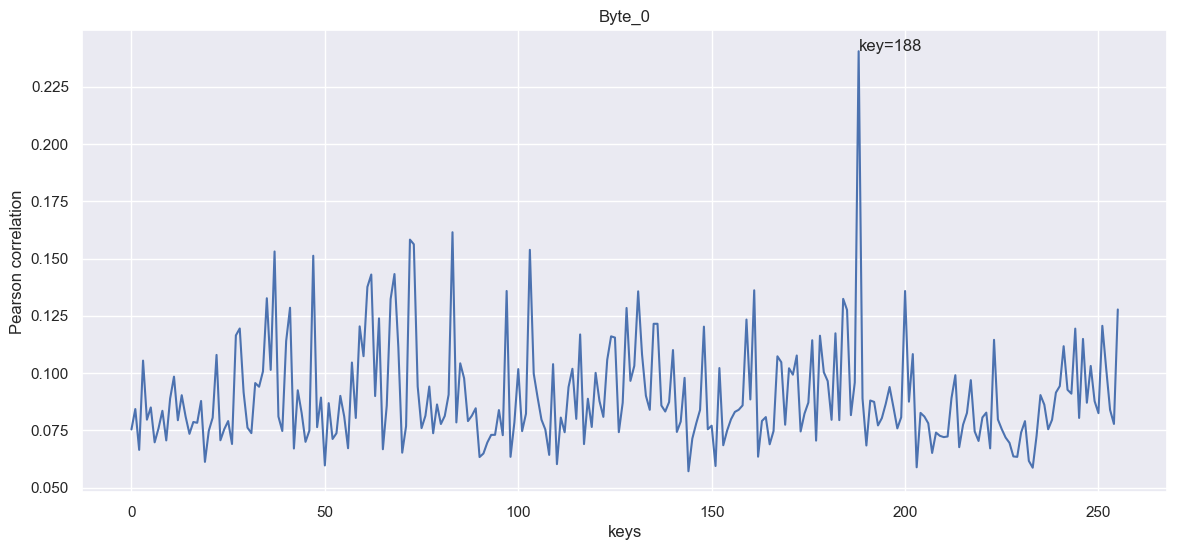

100%|██████████| 256/256 [03:16<00:00,  1.30it/s]


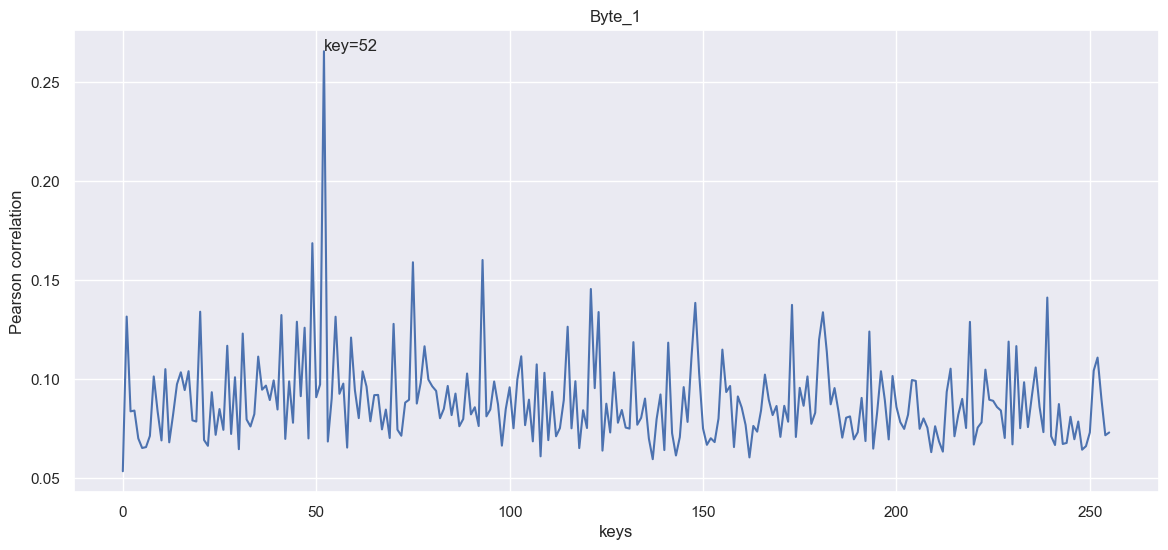

100%|██████████| 256/256 [03:20<00:00,  1.28it/s]


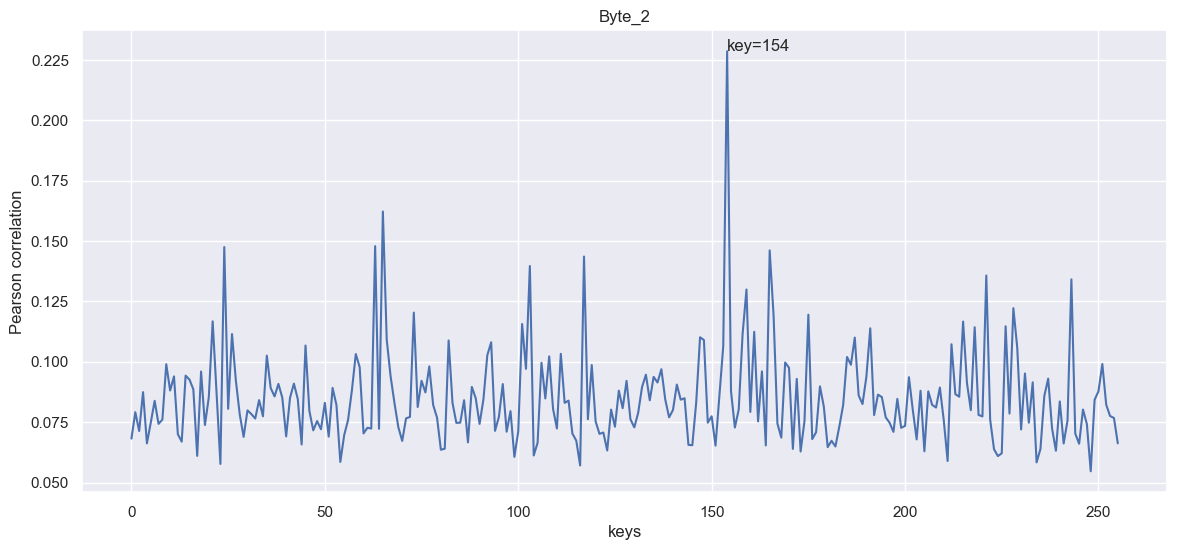

100%|██████████| 256/256 [03:19<00:00,  1.28it/s]


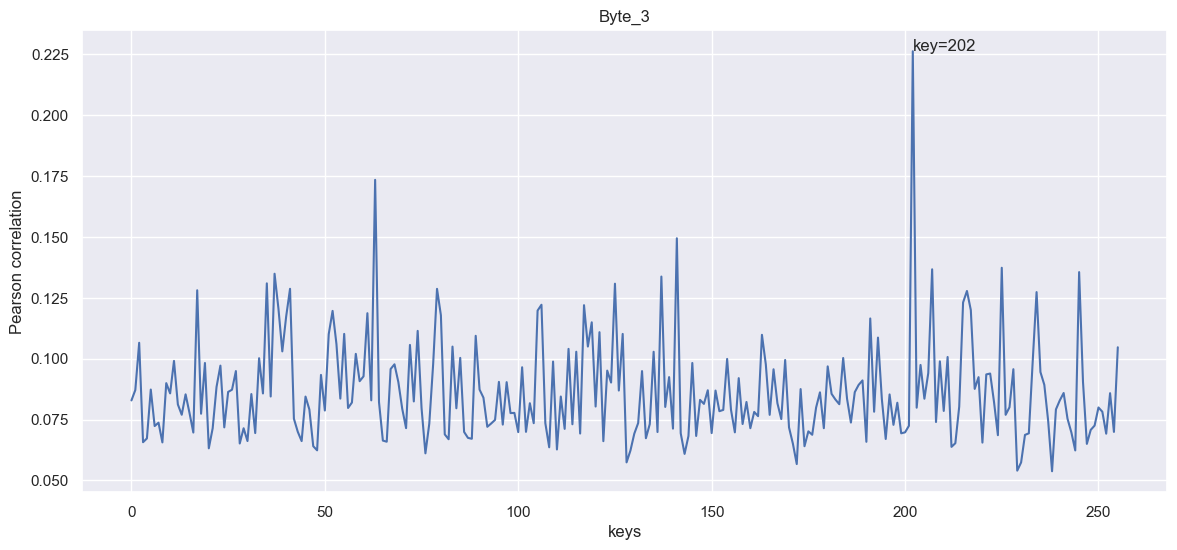

100%|██████████| 256/256 [03:17<00:00,  1.30it/s]


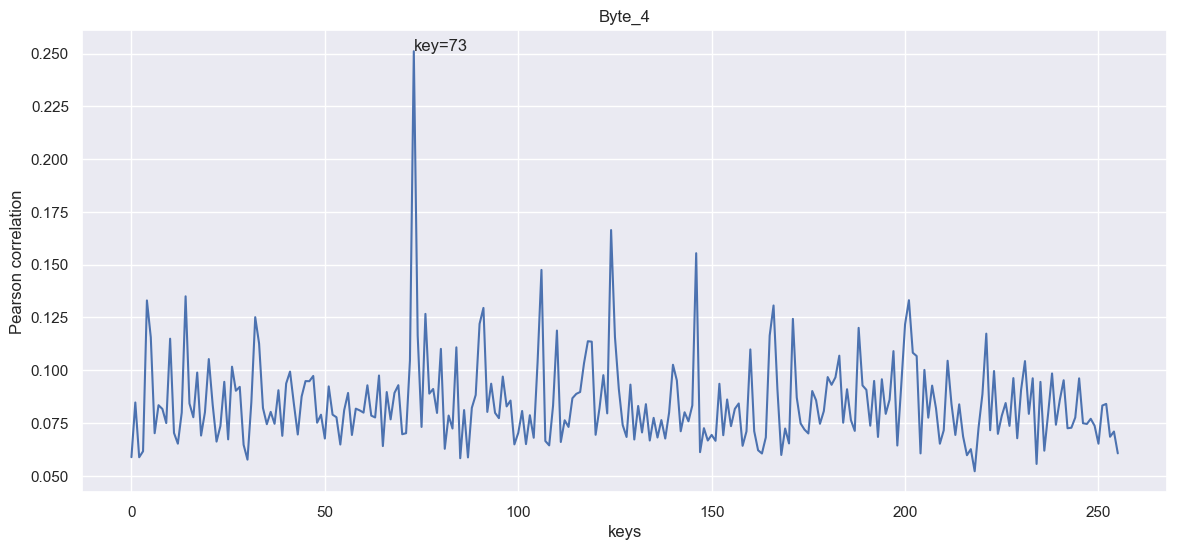

100%|██████████| 256/256 [03:20<00:00,  1.28it/s]


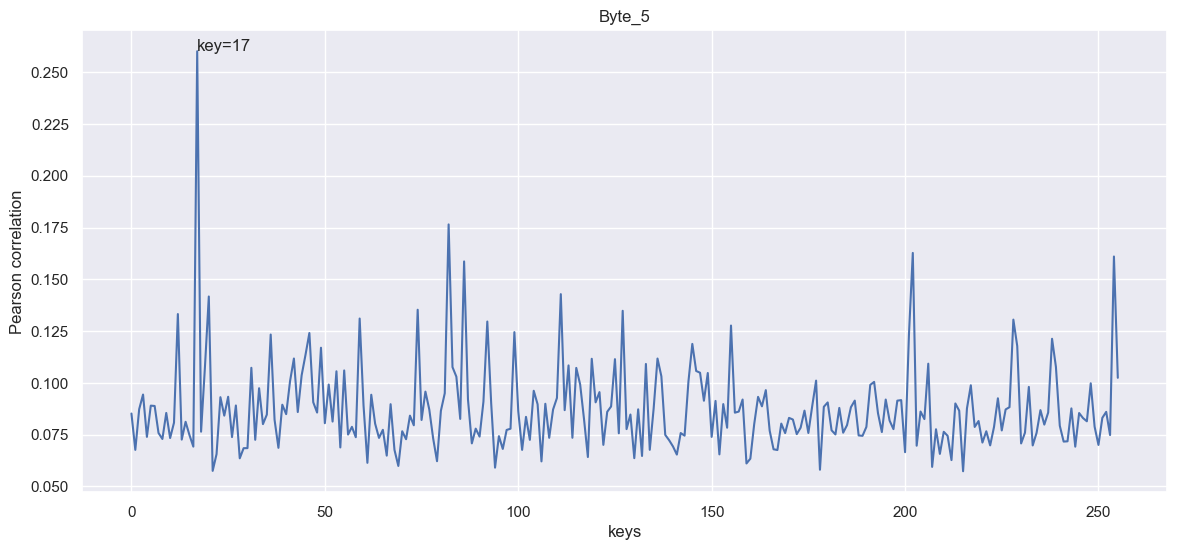

100%|██████████| 256/256 [03:19<00:00,  1.29it/s]


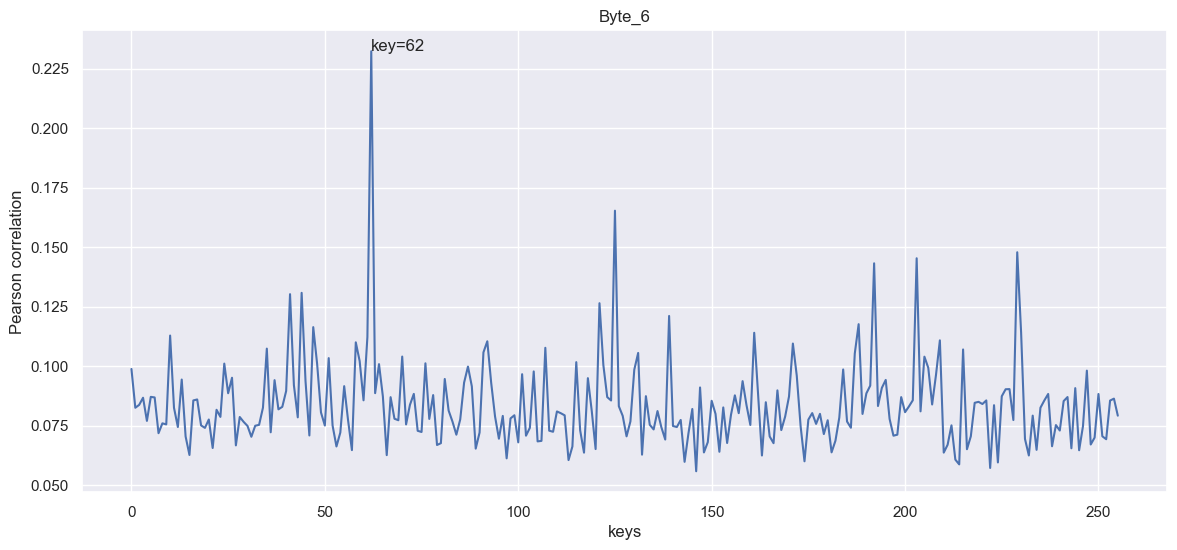

100%|██████████| 256/256 [03:19<00:00,  1.29it/s]


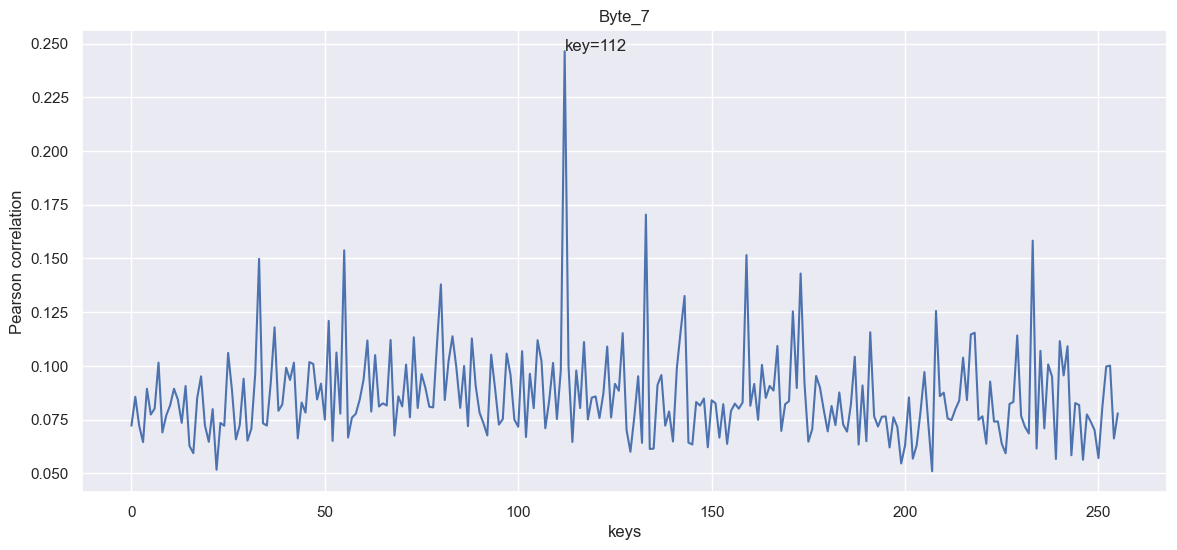

100%|██████████| 256/256 [03:20<00:00,  1.28it/s]


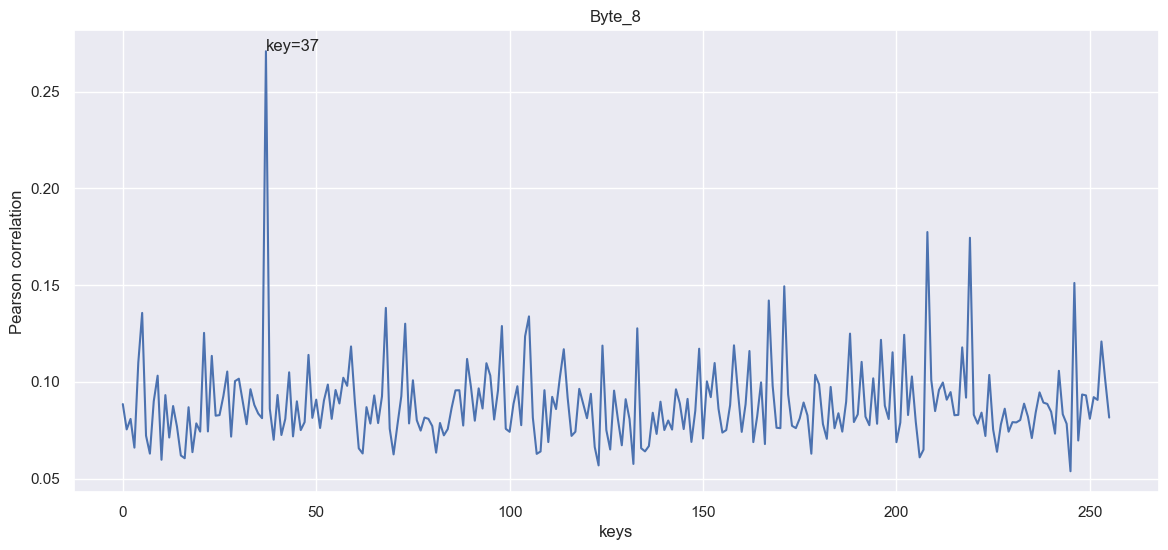

100%|██████████| 256/256 [03:20<00:00,  1.28it/s]


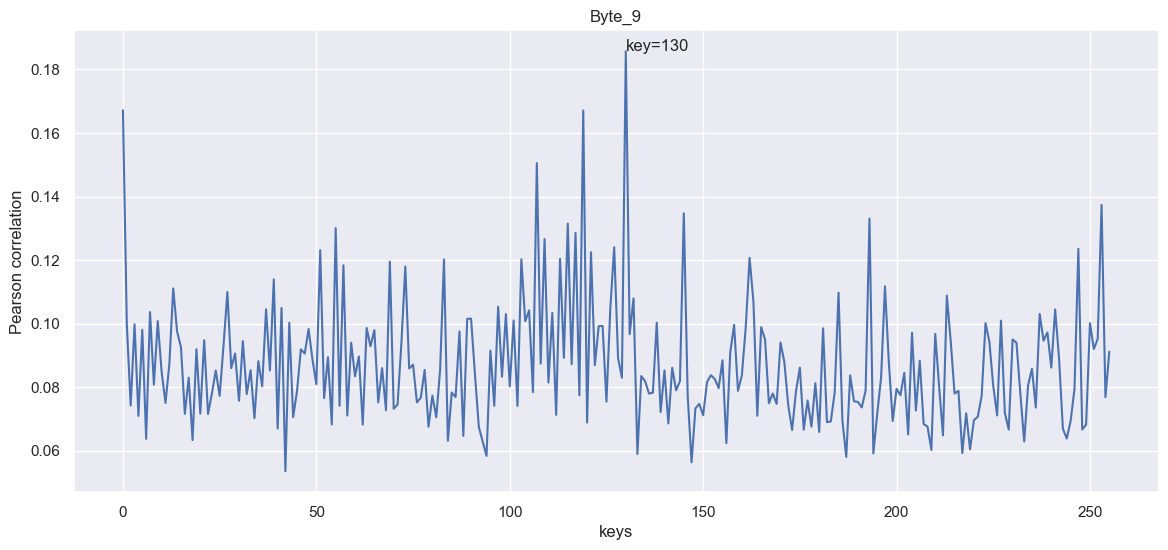

100%|██████████| 256/256 [03:20<00:00,  1.28it/s]


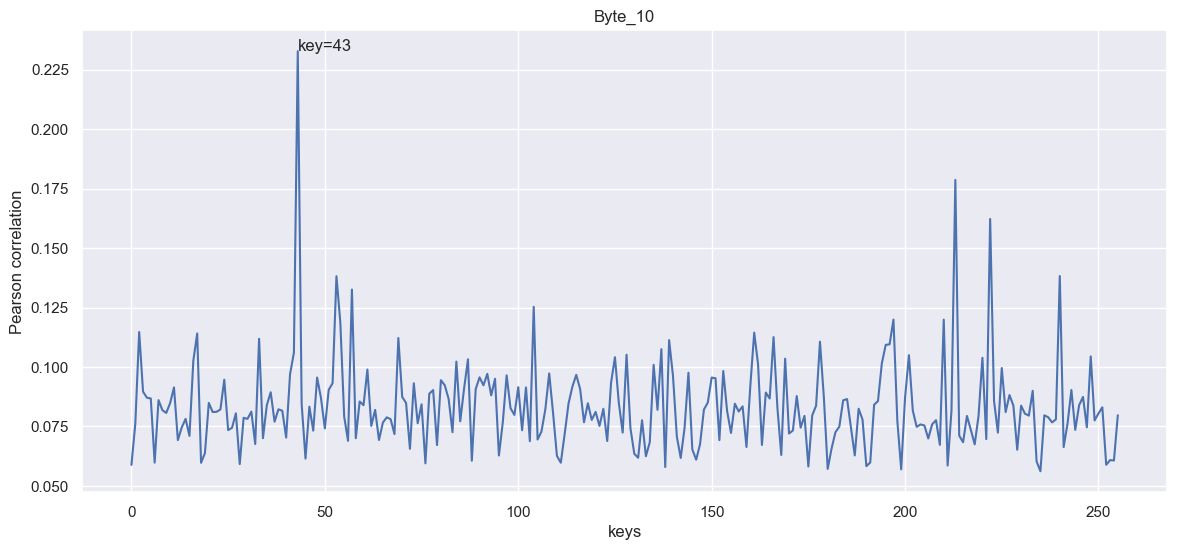

100%|██████████| 256/256 [03:20<00:00,  1.28it/s]


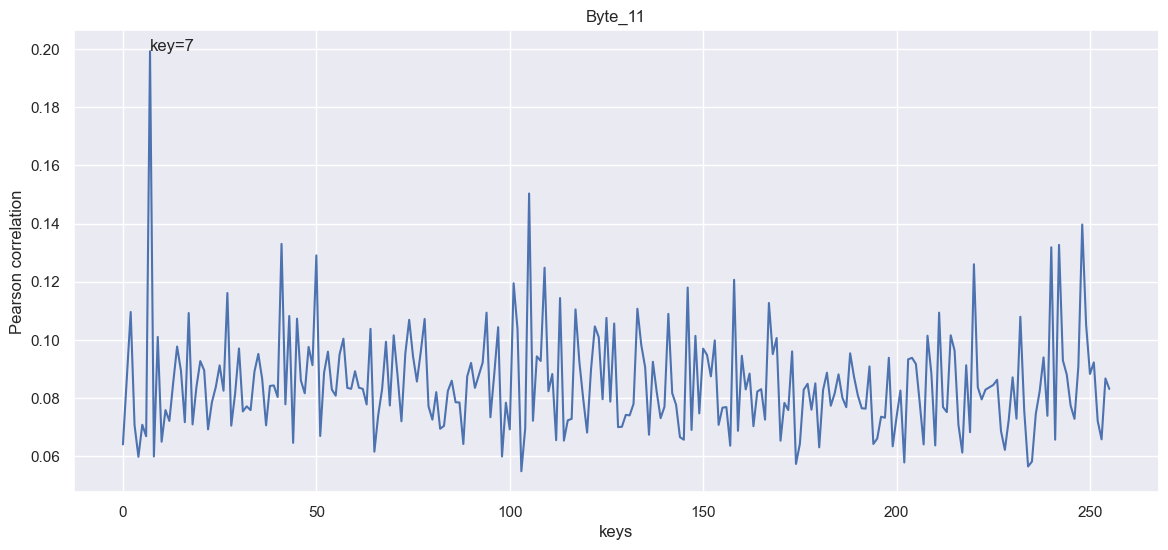

100%|██████████| 256/256 [03:18<00:00,  1.29it/s]


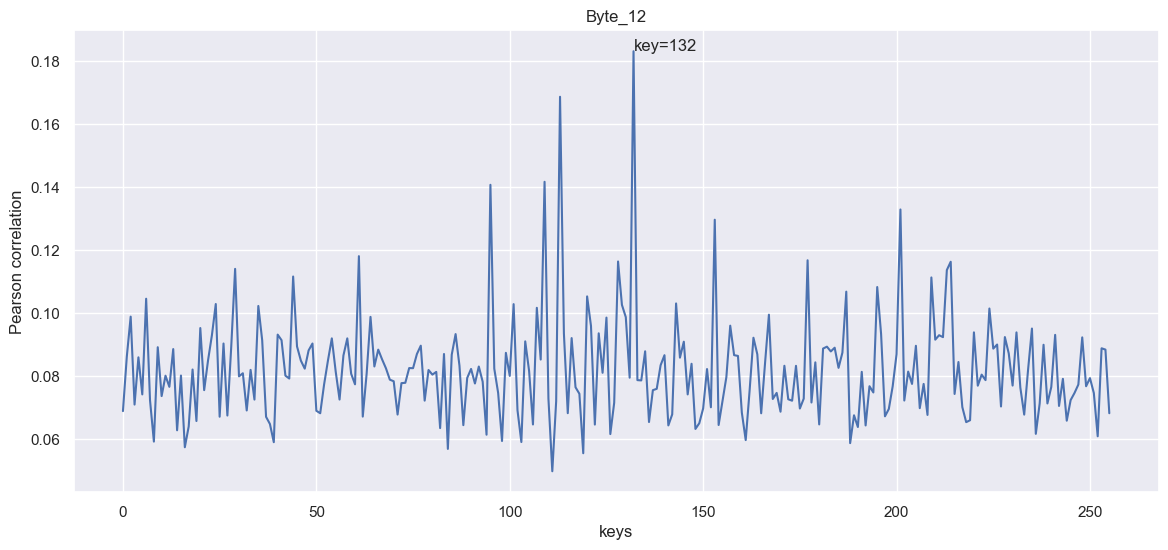

100%|██████████| 256/256 [03:20<00:00,  1.28it/s]


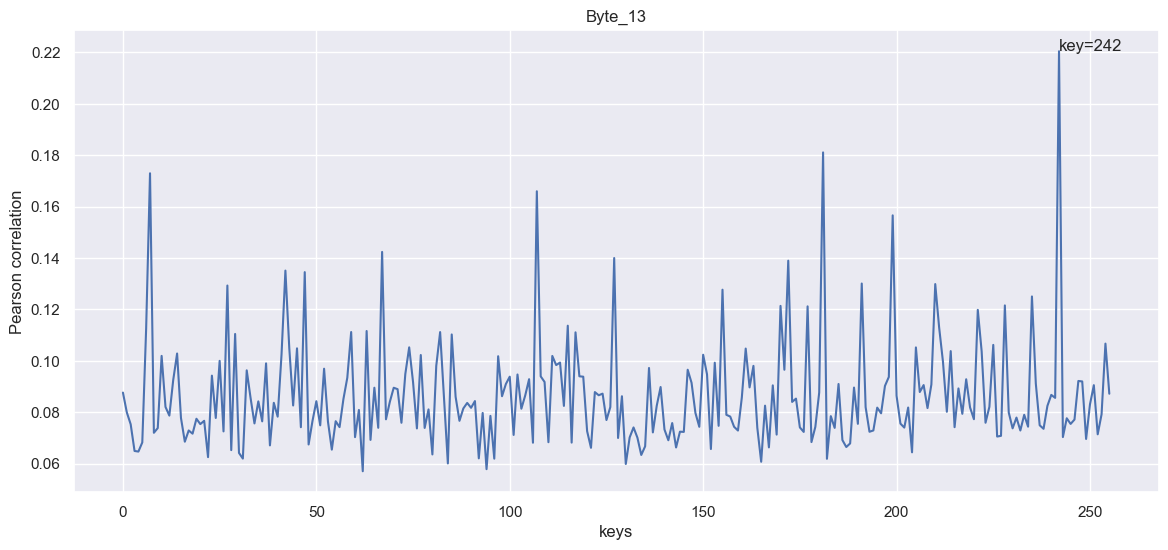

100%|██████████| 256/256 [03:21<00:00,  1.27it/s]


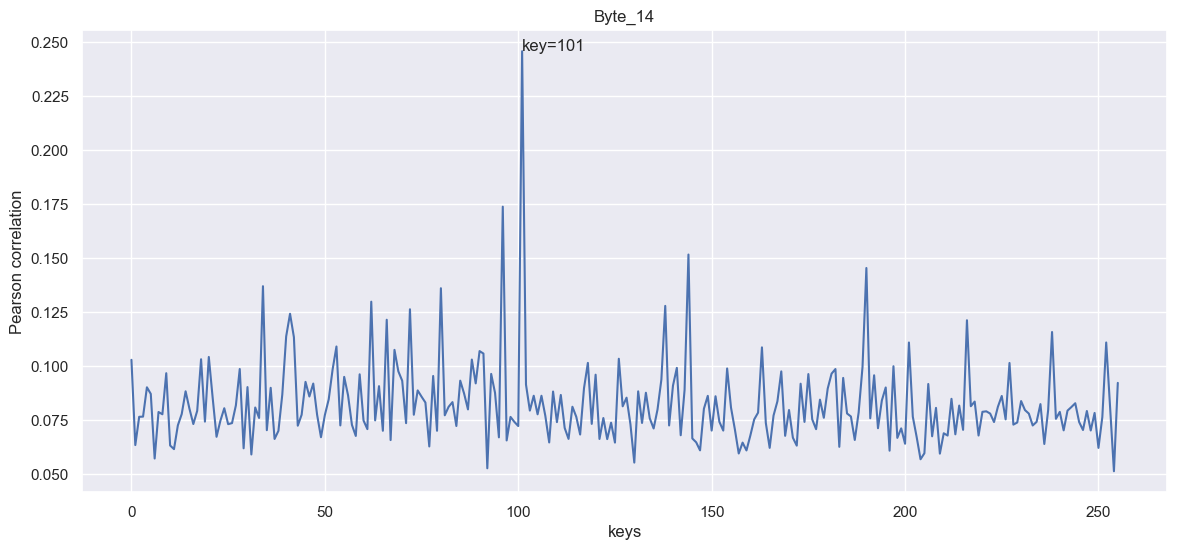

100%|██████████| 256/256 [03:21<00:00,  1.27it/s]


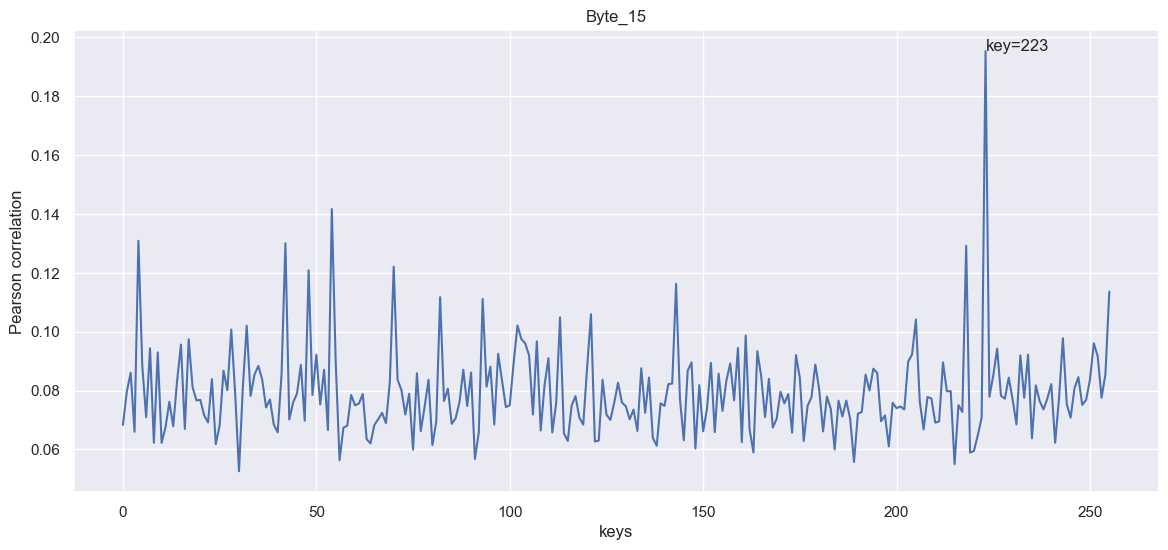

real keys:[[188  52 154 ... 242 101 223]
 [188  52 154 ... 242 101 223]
 [188  52 154 ... 242 101 223]
 ...
 [188  52 154 ... 242 101 223]
 [188  52 154 ... 242 101 223]
 [188  52 154 ... 242 101 223]], 
 guess keys[188, 52, 154, 202, 73, 17, 62, 112, 37, 130, 43, 7, 132, 242, 101, 223]


In [16]:
guess_keys = []
for byte in range(16):
    data = []
    for k in tqdm(range(256)):
        # 遍历key的可能
        targets = np.zeros(shape=(len(traces)))
        for index, trace in enumerate(traces):
            targets[index] = get_mid(plaintext[index][byte], k)
        
        tmp_pearson_list = np.zeros(shape=traces.shape[1])
        # 求每个密钥对应所有列的Pearson系数
        for point_index in range(traces.shape[1]):
            tmp_pearson_list[point_index] = pcc(targets, traces[:, point_index])

        # 取相关性最大的值 对应的索引就是猜测的key值
        data.append(max(tmp_pearson_list))
        # plt.figure(figsize=(15, 7))   # 绘制对应byte的corr
        # sns.set_theme()
        # plt.plot(tmp_pearson_list)
        # plt.show()
    key = np.argmax(data)
    guess_keys.append(key)
    plt.figure(figsize=(14, 6))
    sns.set_theme()
    sns.lineplot(data)
    plt.annotate(f"key={key}", xy=(key, data[key]))
    plt.title(f'Byte_{byte}')
    plt.xlabel('keys')
    plt.ylabel('Pearson correlation')
    plt.show()
    
print(f'real_keys:{real_keys[0]}, \n guessed_keys{guess_keys}')